# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import zipfile

In [2]:
# Your code here
zf = zipfile.ZipFile('/Users/rube/datamex_082020/module-3/lab-supervised-classification/data_all.zip')
data = pd.read_csv(zf.open('data_all.csv'))
data

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116317,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116318,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116319,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [4]:
data.describe()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,116322.000000,116322.0,116322.0,116322.0,116322.0,116322.000000,116322.000000,116322.000000,116322.000000,116322.000000,...,116322.000000,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0
mean,19.252695,0.0,0.0,0.0,0.0,0.000009,0.001083,0.002141,0.002149,0.001788,...,0.000172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,17.817294,0.0,0.0,0.0,0.0,0.002932,0.369436,0.730077,0.733009,0.609863,...,0.058641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,61.000000,0.0,0.0,0.0,0.0,1.000000,126.000000,249.000000,250.000000,208.000000,...,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.isnull().sum() #no hay vacíos solo ceros

e      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64

<AxesSubplot:ylabel='e'>

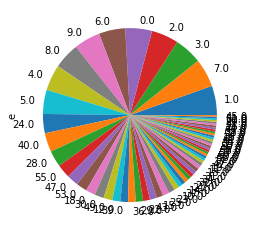

In [6]:
data['e'].value_counts().plot(kind = 'pie') # no dice mucho la gráfica de pastel

In [7]:
data.loc[[1]]

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
lista_e = list(data['e'].unique())
print(len(lista_e)) #el tamaño son 64

62


In [9]:
print(lista_e) #cada e debe ser número, mayuscula y/o minuscula, en teoría cada fila es una imagen (28*28 = 784)

[36.0, 0.0, 3.0, 33.0, 30.0, 24.0, 40.0, 5.0, 8.0, 2.0, 4.0, 47.0, 7.0, 32.0, 60.0, 18.0, 46.0, 59.0, 12.0, 37.0, 53.0, 15.0, 1.0, 9.0, 38.0, 43.0, 44.0, 19.0, 55.0, 6.0, 58.0, 41.0, 20.0, 29.0, 28.0, 31.0, 42.0, 39.0, 25.0, 49.0, 35.0, 14.0, 57.0, 34.0, 26.0, 61.0, 11.0, 13.0, 27.0, 51.0, 23.0, 10.0, 22.0, 56.0, 48.0, 52.0, 16.0, 17.0, 54.0, 21.0, 50.0, 45.0]


In [10]:
data[data['e']==0] #hay voleres repetidos

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
ejemplo=(data[data['e']==15]).iloc[[0]] #tomo la linea cero porque no funcionó random.choice

In [12]:
imagen = np.array(ejemplo.drop("e", axis=1)).reshape(28,28)

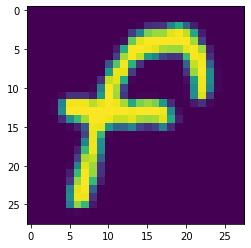

In [13]:
plt.imshow(imagen)

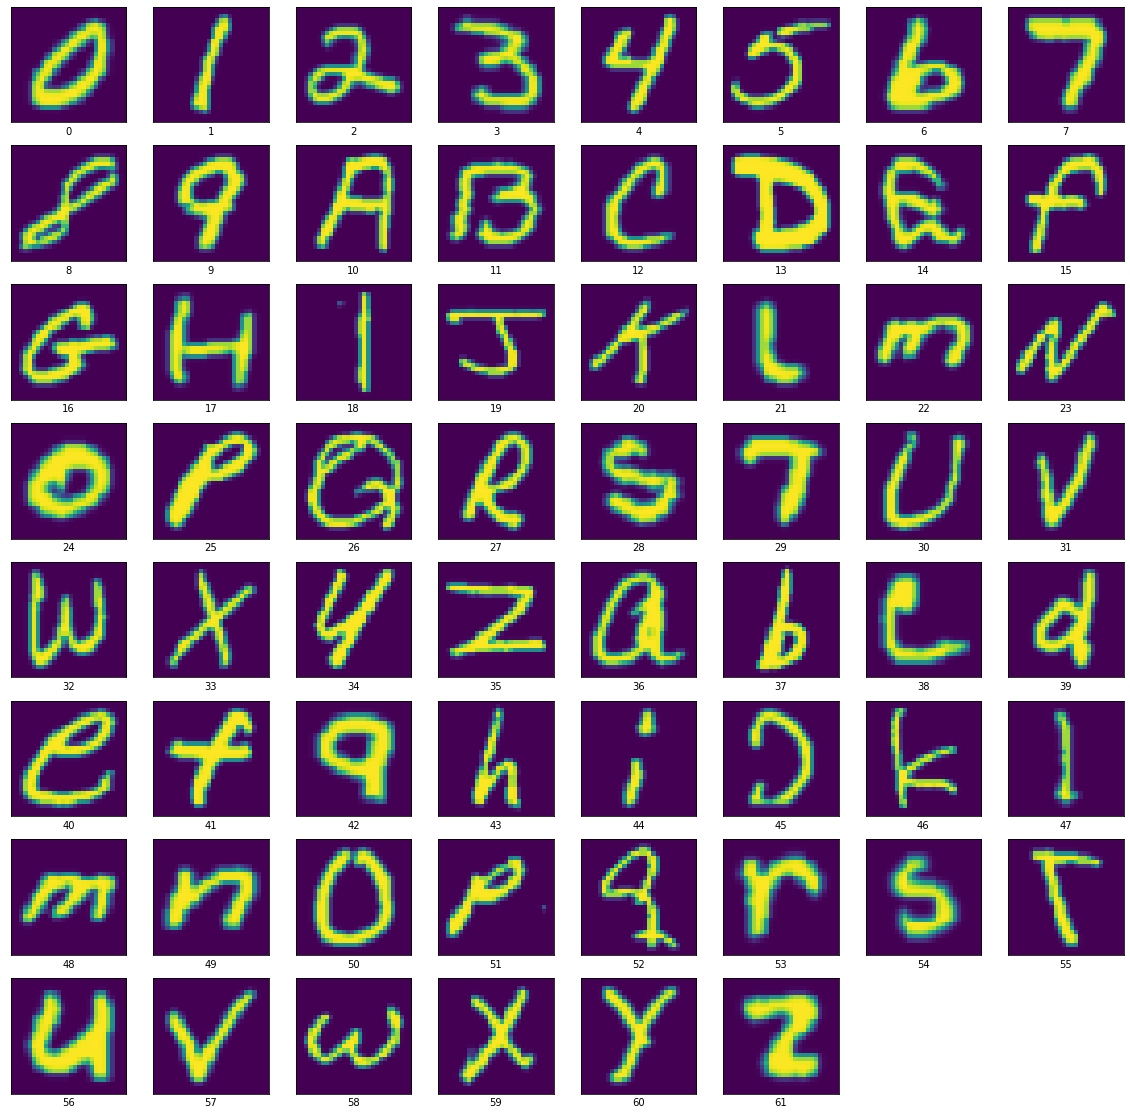

In [14]:
#intento graficar todas al mismo tiempo
plt.figure(figsize=(20,20))
for i in range(62):
    ejemplo=(data[data['e']==i]).iloc[[0]] #siempre debe haber valor cero
    imagen= np.array(ejemplo.drop("e", axis=1)).reshape(28,28)
    plt.subplot(8,8,i+1)
    plt.xticks([])#quita lineas eje x
    plt.yticks([])#quita lineas eje y
    plt.imshow(imagen)
    plt.xlabel(i)
    
plt.show();

In [15]:
'''del 0 al 9 son numeros, 10 al 35 mayusculas, 36 al 61 minusculas ''' #conclusiones que no saben cuanto trabajo me costo llegar a esto

'del 0 al 9 son numeros, 10 al 35 mayusculas, 36 al 61 minusculas '

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [16]:
# Your code here
#importo modelos de clasifcación
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.naive_bayes import GaussianNB as GNB #Bayes para regresion 
from sklearn.naive_bayes import MultinomialNB as MNB #Bayes con variables discretas (categoricas)
from sklearn.naive_bayes import ComplementNB as CNB
from sklearn.naive_bayes import BernoulliNB as BNB
from catboost import CatBoostClassifier as CATB


In [17]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [18]:
#funcion clase de hoy
import re
def modeling_testing(lista_modelos, data, target):
    X_train, X_test, y_train, y_test = tts(data.loc[:, data.columns != target], data[target])
    
    for i in lista_modelos:
        modelo = i()
        modelo.fit(X_train, y_train)
        train_score = modelo.score(X_train, y_train)
        test_score = modelo.score(X_test, y_test)
        y_pred = modelo.predict(X_test)
        error = r2_score(y_pred,y_test)-1
        print('Modelo:',re.findall(r'\b(\w+)\b\'\>',str(i))[0])
        print('Train score:', train_score,'\nTest score:',test_score,'\n')
        print('predicctions r2 score', error)
        

In [19]:
modelos=[logreg]

In [20]:
mayusculas = data[(data['e']>=10)&(data['e']<36)]

In [21]:
modeling_testing(modelos, mayusculas, 'e') #es mucho para mi computadora poner mas de un modelo, alcance las maximas iteraciones

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Modelo: LogisticRegression
Train score: 0.8927599115194828 
Test score: 0.8182978180426184 

predicctions r2 score -0.4405459121261841


* Try to do the same thing with lowercases.

In [22]:
# Your code here
minusculas = data[data['e']>=36]

In [23]:
modeling_testing(modelos,minusculas, 'e')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Modelo: LogisticRegression
Train score: 0.848822312013403 
Test score: 0.7856614929785661 

predicctions r2 score -0.38489178095877064


* Try to do the same thing with numbers.

In [24]:
# Your code here
numeros= data[data['e']<=9]

In [25]:
modeling_testing(modelos,minusculas, 'e')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Modelo: LogisticRegression
Train score: 0.8495614467330246 
Test score: 0.78980044345898 

predicctions r2 score -0.3870684097125543


In [26]:
#solo corrio con lin reg